# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

In [2]:
import os
import kaggle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

The purpose of this work is to analize the evolution of the population and air quality index with time by country.  
The population data was gathered at country level, the air quality at city level. The latter was aggregated in order to be combined with the former.  

Research Questions:
- Which are the top 10 countries with better (in average) air quality index?
- Is there any relationship between population and air quality index?

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**: World population by country

Type: CSV File.

Method: Manually downloaded file from Kaggle https://www.kaggle.com/datasets/kaggleashwin/population-dataset

Dataset variables:
- Country Name: Name of the country
- Country Code: Code of the country
- 1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,  
1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,  
1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,  
2013,2014,2015,2016,2017,2018,2019,2020,2021: Population for each year



In [3]:
countries_population = pd.read_csv("World-population-by-countries-dataset.csv")

#### **Dataset 2:** Air Quality Index by City

Type: CSV File

Method: Gathered from Kaggle https://www.kaggle.com/datasets/ramjasmaurya/most-polluted-cities-and-countries-iqair-index?select=AIR+QUALITY+INDEX+%28by+cities%29+-+IQAir.csv


Dataset variables:
- Rank: Ranking
- City: City Name
- 2021: Air Quality Index for 2021
- JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),  
   AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021): Air Quality Index for each month of 2021
- 2020,2019,2018,2017: Air Quality Index for those years



In [160]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('ramjasmaurya/most-polluted-cities-and-countries-iqair-index', path='./', unzip=True)

In [5]:
cities_aqi = pd.read_csv("AIR QUALITY INDEX (by cities) - IQAir.csv")

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### **Dataset 1**

### Quality Issue 1: Completeness

In [6]:
# Inspecting the dataframe visually
countries_population[countries_population.isnull().any(axis=1)]

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
69,Eritrea,ERI,1007586.0,1033320.0,1060489.0,1088859.0,1118152.0,1148188.0,1178875.0,1210304.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Kuwait,KWT,269026.0,300581.0,337346.0,378756.0,423900.0,472032.0,523169.0,577164.0,...,3348852.0,3526382.0,3690939.0,3835588.0,3956862.0,4056102.0,4137314.0,4207077.0,4270563.0,4328553.0
196,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0,4922749.0
361,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0,4922749.0
432,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,Eritrea,ERI,1007586.0,1033320.0,1060489.0,1088859.0,1118152.0,1148188.0,1178875.0,1210304.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,Kuwait,KWT,269026.0,300581.0,337346.0,378756.0,423900.0,472032.0,523169.0,577164.0,...,3348852.0,3526382.0,3690939.0,3835588.0,3956862.0,4056102.0,4137314.0,4207077.0,4270563.0,4328553.0


In [7]:
#FILL IN - Inspecting the dataframe programmatically
countries_population.isnull().sum()

Country Name    0
Country Code    0
1960            4
1961            4
1962            4
               ..
2017            4
2018            4
2019            4
2020            4
2021            4
Length: 64, dtype: int64

In [8]:
countries_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  532 non-null    object 
 1   Country Code  532 non-null    object 
 2   1960          528 non-null    float64
 3   1961          528 non-null    float64
 4   1962          528 non-null    float64
 5   1963          528 non-null    float64
 6   1964          528 non-null    float64
 7   1965          528 non-null    float64
 8   1966          528 non-null    float64
 9   1967          528 non-null    float64
 10  1968          528 non-null    float64
 11  1969          528 non-null    float64
 12  1970          528 non-null    float64
 13  1971          528 non-null    float64
 14  1972          528 non-null    float64
 15  1973          528 non-null    float64
 16  1974          528 non-null    float64
 17  1975          528 non-null    float64
 18  1976          528 non-null    

There are eight rows with at least one missing value, what represents a Completness issue.  
The "Not classified" record, has all its value missing.  
Other records have some of them empty.  
The missing value is correctly represented.

### Quality Issue 2: Uniqueness

In [9]:
#FILL IN - Inspecting the dataframe v)isually
sum(countries_population.duplicated())

266

In [10]:
countries_population[countries_population['Country Name'] == 'Argentina']

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
9,Argentina,ARG,20481781.0,20817270.0,21153042.0,21488916.0,21824427.0,22159644.0,22494031.0,22828872.0,...,41733271.0,42202935.0,42669500.0,43131966.0,43590368.0,44044811.0,44494502.0,44938712.0,45376763.0,45808747.0
390,Argentina,ARG,20481781.0,20817270.0,21153042.0,21488916.0,21824427.0,22159644.0,22494031.0,22828872.0,...,41733271.0,42202935.0,42669500.0,43131966.0,43590368.0,44044811.0,44494502.0,44938712.0,45376763.0,45808747.0


The dataset has duplicate values

### Tidiness Issue 1: Column headers are values not names.

In [11]:
#FILL IN - Inspecting the dataframe visually
countries_population.head(5)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


All the columns names that are years, should be values in a column named year, for example.

### Tidiness Issue 2: Multiple types of observational units are stored in the same table. 

There are records that do not represent countries, for these records the Country code is a makeup of the first initial letters.  
On the other side,  there are different codes to identify a country: ISO 3166-1 alphas, FIPS, IOC and TLD.  
In this dataset, the code corresponde to ISO 3166-1 alpha-3. This could have been used as column name.

The table has data for not only countries, but regions and different grouping of populations.  
Those types should be stored in a different table

In [12]:
countries_population[countries_population['Country Name'].str.contains(r'\(excluding', na=False)]

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
61,East Asia & Pacific (excluding high income),EAP,894885526.0,894489549.0,906424232.0,929645285.0,952505018.0,976371564.0,1.003811e+09,1.030352e+09,...,1.997903e+09,2.014797e+09,2.031204e+09,2.046848e+09,2.062250e+09,2.077989e+09,2.091698e+09,2.103723e+09,2.114009e+09,2.122086e+09
64,Europe & Central Asia (excluding high income),ECA,256240323.0,260376316.0,264562393.0,268766831.0,272959744.0,277095486.0,2.804976e+08,2.838327e+08,...,3.824769e+08,3.850509e+08,3.876219e+08,3.902580e+08,3.928362e+08,3.952575e+08,3.974061e+08,3.993861e+08,4.008960e+08,4.018289e+08
128,Latin America & Caribbean (excluding high income),LAC,195990480.0,201468291.0,207117533.0,212913161.0,218820356.0,224812280.0,2.308801e+08,2.370242e+08,...,5.428608e+08,5.487167e+08,5.546329e+08,5.606499e+08,5.668014e+08,5.730449e+08,5.792552e+08,5.852573e+08,5.909282e+08,5.962176e+08
161,Middle East & North Africa (excluding high inc...,MNA,97553136.0,100147125.0,102808039.0,105546241.0,108376349.0,111307810.0,1.143518e+08,1.175038e+08,...,3.449984e+08,3.512904e+08,3.576298e+08,3.639756e+08,3.702940e+08,3.765885e+08,3.829552e+08,3.894571e+08,3.961478e+08,4.030516e+08
215,Sub-Saharan Africa (excluding high income),SSA,227191484.0,232524118.0,238077562.0,243848199.0,249827334.0,256012349.0,2.624058e+08,2.690225e+08,...,9.176376e+08,9.429495e+08,9.688670e+08,9.953651e+08,1.022436e+09,1.050067e+09,1.078223e+09,1.106860e+09,1.135948e+09,1.165465e+09
288,Latin America & Caribbean (excluding high income),LAC,195990480.0,201468291.0,207117533.0,212913161.0,218820356.0,224812280.0,2.308801e+08,2.370242e+08,...,5.428608e+08,5.487167e+08,5.546329e+08,5.606499e+08,5.668014e+08,5.730449e+08,5.792552e+08,5.852573e+08,5.909282e+08,5.962176e+08
304,Sub-Saharan Africa (excluding high income),SSA,227191484.0,232524118.0,238077562.0,243848199.0,249827334.0,256012349.0,2.624058e+08,2.690225e+08,...,9.176376e+08,9.429495e+08,9.688670e+08,9.953651e+08,1.022436e+09,1.050067e+09,1.078223e+09,1.106860e+09,1.135948e+09,1.165465e+09
325,Middle East & North Africa (excluding high inc...,MNA,97553136.0,100147125.0,102808039.0,105546241.0,108376349.0,111307810.0,1.143518e+08,1.175038e+08,...,3.449984e+08,3.512904e+08,3.576298e+08,3.639756e+08,3.702940e+08,3.765885e+08,3.829552e+08,3.894571e+08,3.961478e+08,4.030516e+08
370,Europe & Central Asia (excluding high income),ECA,256240323.0,260376316.0,264562393.0,268766831.0,272959744.0,277095486.0,2.804976e+08,2.838327e+08,...,3.824769e+08,3.850509e+08,3.876219e+08,3.902580e+08,3.928362e+08,3.952575e+08,3.974061e+08,3.993861e+08,4.008960e+08,4.018289e+08
371,East Asia & Pacific (excluding high income),EAP,894885526.0,894489549.0,906424232.0,929645285.0,952505018.0,976371564.0,1.003811e+09,1.030352e+09,...,1.997903e+09,2.014797e+09,2.031204e+09,2.046848e+09,2.062250e+09,2.077989e+09,2.091698e+09,2.103723e+09,2.114009e+09,2.122086e+09


### **Dataset 2**

### Quality Issue 1 and 2: Validity and Completness

In [13]:
cities_aqi.sample(n=5, random_state=16)

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
1960,1961,"Duarte, USA",14.0,9,12.2,6.3,11.1,15.3,12.8,17.5,16.4,17.8,8.9,28.7,15.8,18,13.2,-,-
5967,5968,"Manchester, USA",6.1,9.2,4.7,7.2,5.3,3.6,6.7,5.6,8,4.4,5.7,7.7,4.7,-,-,-,-
564,565,"Chiang Saen, Thailand",27.5,41.5,41.3,108,52.1,19.4,10.7,5.8,6.1,6.3,9.3,11.3,23.4,43.7,24.4,-,-
1053,1054,"Kernville, USA",20.4,6,10.2,5.2,5.7,4.2,6.1,8,39.5,103.1,33.8,7.7,5.5,20.2,9.3,-,-
1215,1216,"Curico, Chile",19.0,10.9,6.7,11.1,20.9,32.2,37.6,41.2,29.2,18.8,11,7.5,11.2,19,25.8,16.8,23


There are null values indicated by dashes. Misrepresentation of missing values is a Validity issue.  
Additionally, missing values is a compleness issue

### Tidiness Issue 1: Multiple variables stored in the same column. 

In [14]:
cities_aqi.sample(n=5, random_state=16)

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
1960,1961,"Duarte, USA",14.0,9,12.2,6.3,11.1,15.3,12.8,17.5,16.4,17.8,8.9,28.7,15.8,18,13.2,-,-
5967,5968,"Manchester, USA",6.1,9.2,4.7,7.2,5.3,3.6,6.7,5.6,8,4.4,5.7,7.7,4.7,-,-,-,-
564,565,"Chiang Saen, Thailand",27.5,41.5,41.3,108,52.1,19.4,10.7,5.8,6.1,6.3,9.3,11.3,23.4,43.7,24.4,-,-
1053,1054,"Kernville, USA",20.4,6,10.2,5.2,5.7,4.2,6.1,8,39.5,103.1,33.8,7.7,5.5,20.2,9.3,-,-
1215,1216,"Curico, Chile",19.0,10.9,6.7,11.1,20.9,32.2,37.6,41.2,29.2,18.8,11,7.5,11.2,19,25.8,16.8,23


In [15]:
# city name
cities_aqi['City'].str.split(",", expand=True)[0]

0          Bhiwadi
1        Ghaziabad
2            Hotan
3            Delhi
4          Jaunpur
           ...    
6470    Mornington
6471     Emu River
6472       Judbury
6473     St Helens
6474           Chu
Name: 0, Length: 6475, dtype: object

In [16]:
# country name
cities_aqi['City'].str.split(",", expand=True)[1]

0             India
1             India
2             China
3             India
4             India
           ...     
6470      Australia
6471      Australia
6472      Australia
6473      Australia
6474     Kazakhstan
Name: 1, Length: 6475, dtype: object

The City column has the city name and country, both separated by a comma. This is a case when multiple variableas are stored in the same column.  
A new column to store the country will need to be created.

### Tidiness Issue 2: Column header are values, not names.

In [17]:
cities_aqi.sample(n=5, random_state=16)

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
1960,1961,"Duarte, USA",14.0,9,12.2,6.3,11.1,15.3,12.8,17.5,16.4,17.8,8.9,28.7,15.8,18,13.2,-,-
5967,5968,"Manchester, USA",6.1,9.2,4.7,7.2,5.3,3.6,6.7,5.6,8,4.4,5.7,7.7,4.7,-,-,-,-
564,565,"Chiang Saen, Thailand",27.5,41.5,41.3,108,52.1,19.4,10.7,5.8,6.1,6.3,9.3,11.3,23.4,43.7,24.4,-,-
1053,1054,"Kernville, USA",20.4,6,10.2,5.2,5.7,4.2,6.1,8,39.5,103.1,33.8,7.7,5.5,20.2,9.3,-,-
1215,1216,"Curico, Chile",19.0,10.9,6.7,11.1,20.9,32.2,37.6,41.2,29.2,18.8,11,7.5,11.2,19,25.8,16.8,23


The column names with years should be rows for each city.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [18]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes are not impacted
countries_population_df = countries_population.copy(deep=True)

In [19]:
cities_aqi_df = cities_aqi.copy(deep=True)

### **Dataset 1:** World Countries

### **Quality Issue 1:** Completeness

In [20]:
# FILL IN - Apply the cleaning strategy
countries_population_df[countries_population_df['Country Name'] == "Not classified"]

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
110,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
countries_population_df.drop(countries_population_df[countries_population_df['Country Name'] == "Not classified"].index, inplace=True)

In [22]:
# FILL IN - Validate the cleaning was successful
len(countries_population_df[countries_population_df['Country Name'] == "Not classified"])

0

Justification: *Removing empty rows to make a clean and reliable dataset, additionally makes it more efficient and save storage*

### **Quality Issue 2:** Uniqueness

In [23]:
#FILL IN - Apply the cleaning strategy
countries_population_df.drop_duplicates(inplace=True)

In [24]:
#FILL IN - Validate the cleaning was successful
sum(countries_population_df.duplicated())

0

Justification: *Duplicate values add redundancy and could yield to misleading calculations*

### **Tidiness Issue 2:** Multiple types of observational units are stored in the same table

In [25]:
#FILL IN - Validate the cleaning was successful
countries_population_df.drop(countries_population_df[countries_population_df['Country Name'].str.contains(r'\(excluding', na=False)].index, inplace=True)

In [26]:
sum(countries_population_df['Country Name'].str.contains(r'\(excluding', na=False))

0

Justification: *Records that are not countries were removed*

### **Tidiness Issue 1:** Column header are values not names

In [27]:
#FILL IN - Apply the cleaning strategy
countries_population_df.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

In [28]:
countries_population_meltdf = pd.melt(countries_population_df,
                                    id_vars=['Country Name', 'Country Code'],
                                    value_vars=['1960', '1961', '1962', '1963', '1964',
                                    '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
                                    '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
                                    '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
                                    '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
                                    '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                                    '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
                                    '2019', '2020', '2021'],
                                    var_name='Year',
                                    value_name='population'
                                    )

In [29]:
#FILL IN - Validate the cleaning was successful
countries_population_meltdf

,Country Name,Country Code,Year,population
0,Aruba,ABW,1960,54208.0
1,Africa Eastern and Southern,AFE,1960,130836765.0
2,Afghanistan,AFG,1960,8996967.0
3,Africa Western and Central,AFW,1960,96396419.0
4,Angola,AGO,1960,5454938.0
...,...,...,...,...
16115,Kosovo,XKX,2021,1806279.0
16116,"Yemen, Rep.",YEM,2021,30490639.0
16117,South Africa,ZAF,2021,60041996.0
16118,Zambia,ZMB,2021,18920657.0


Justification: *The resulting dataframe has values in rows instead of column*

### **Dataset 2** Cities Air Quality

### **Quality Issue 1 & 2:** Validity and compleness

In [30]:
# get the columns to replace the dashes
cities_aqi_df.columns

Index(['Rank', 'City', '2021', 'JAN(2021)', 'FEB(2021)', 'MAR(2021)',
       'APR(2021)', 'MAY(2021)', 'JUN(2021)', 'JUL(2021)', 'AUG(2021)',
       'SEP(2021)', 'OCT(2021)', 'NOV(2021)', 'DEC(2021)', '2020', '2019',
       '2018', '2017'],
      dtype='object')

In [31]:
columns_to_replace_dash = ['2021', 'JAN(2021)', 'FEB(2021)', 'MAR(2021)',
                            'APR(2021)', 'MAY(2021)', 'JUN(2021)', 'JUL(2021)', 'AUG(2021)',
                            'SEP(2021)', 'OCT(2021)', 'NOV(2021)', 'DEC(2021)', '2020', '2019',
                            '2018', '2017']

In [32]:
# replacing dash as nan
cities_aqi_df[columns_to_replace_dash] = cities_aqi_df[columns_to_replace_dash].replace('-', np.nan)

In [33]:
cities_aqi_df[columns_to_replace_dash].isin(['-']).any().any()

np.False_

There are no more values with dashes.

### **Quality Issue 3:** Validate the yearly 2021 data with monthly 2021

In [34]:
# cast as float
cities_aqi_df[columns_to_replace_dash] = cities_aqi_df[columns_to_replace_dash].astype(float)

In [35]:
monthly_2021_cols = ['JAN(2021)','FEB(2021)','MAR(2021)','APR(2021)','MAY(2021)','JUN(2021)','JUL(2021)','AUG(2021)','SEP(2021)','OCT(2021)','NOV(2021)','DEC(2021)']

In [36]:
# calculate the mean from monthly values
cities_aqi_df['2021_calculated'] = cities_aqi_df[monthly_2021_cols].mean(axis=1)

In [37]:
cities_aqi_df["2021_difference"] = cities_aqi_df["2021"] - cities_aqi_df["2021_calculated"]

In [38]:
cities_aqi_df["2021_difference"].describe()

count    6475.000000
mean        0.039291
std         0.760093
min       -15.445455
25%        -0.054545
50%         0.016667
75%         0.141667
max        10.208333
Name: 2021_difference, dtype: float64

In [39]:
# looking at the statistics, 75% of the values are under 0.14. Dropping 2021 monthly values in favor of provided yearly
cities_aqi_df.drop(columns=monthly_2021_cols, inplace=True)

In [40]:
cities_aqi_df.drop(columns=['2021_calculated', '2021_difference'], inplace=True)

In [41]:
cities_aqi_df

,Rank,City,2021,2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,95.5,83.4,125.4,NaN
1,2,"Ghaziabad, India",102.0,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,110.2,110.1,116.0,91.9
3,4,"Delhi, India",96.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6470,6471,"Mornington, Australia",2.4,3.2,3.8,3.0,3.9
6471,6472,"Emu River, Australia",2.1,2.6,2.5,2.6,2.3
6472,6473,"Judbury, Australia",2.0,2.4,5.7,2.2,1.9
6473,6474,"St Helens, Australia",1.9,2.4,2.4,2.9,3.3


### **Tidiness Issue 1:** Multiple variables stored in the same column.

In [42]:
# country name
cities_aqi_df['country'] = cities_aqi_df['City'].str.split(",", expand=True)[1]

In [43]:
cities_aqi_df['City'] = cities_aqi_df['City'].str.split(",", expand=True)[0]

In [44]:
cities_aqi_df.head()

,Rank,City,2021,2020,2019,2018,2017,country
0,1,Bhiwadi,106.2,95.5,83.4,125.4,NaN,India
1,2,Ghaziabad,102.0,106.6,110.2,135.2,144.6,India
2,3,Hotan,101.5,110.2,110.1,116.0,91.9,China
3,4,Delhi,96.4,84.1,98.6,113.5,108.2,India
4,5,Jaunpur,95.3,NaN,NaN,NaN,NaN,India


### **Tidiness Issue 2:** Column header are values not names

In [45]:
cities_aqi_meltdf = pd.melt(cities_aqi_df,
                        id_vars=['City', 'country'],
                        value_vars=['2021','2020', '2019', '2018', '2017'],
                        var_name='year',
                        value_name='air_quality_index'
                        )

In [46]:
cities_aqi_meltdf

,City,country,year,air_quality_index
0,Bhiwadi,India,2021,106.2
1,Ghaziabad,India,2021,102.0
2,Hotan,China,2021,101.5
3,Delhi,India,2021,96.4
4,Jaunpur,India,2021,95.3
...,...,...,...,...
32370,Mornington,Australia,2017,3.9
32371,Emu River,Australia,2017,2.3
32372,Judbury,Australia,2017,1.9
32373,St Helens,Australia,2017,3.3


### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

Creating a country-level dataframe from cities air quality index

In [47]:
cities_aqi_meltdf['air_quality_index'] = cities_aqi_meltdf['air_quality_index'].astype(float)

In [48]:
#FILL IN - Remove unnecessary variables and combine datasets
countries_aqi_df = cities_aqi_meltdf.groupby(['country', 'year'])['air_quality_index'].mean().reset_index()
countries_aqi_df

,country,year,air_quality_index
0,Afghanistan,2017,NaN
1,Afghanistan,2018,61.800000
2,Afghanistan,2019,58.800000
3,Afghanistan,2020,46.500000
4,Afghanistan,2021,37.500000
...,...,...,...
585,Vietnam,2017,34.700000
586,Vietnam,2018,33.850000
587,Vietnam,2019,31.675000
588,Vietnam,2020,25.750000


Join both dataframes to get the population and air quality index on the same dataframe

In [49]:
countries_aqi_df['country'] = countries_aqi_df['country'].astype(str).str.strip()
countries_aqi_df['year'] = countries_aqi_df['year'].astype(int)

In [50]:
countries_population_meltdf['Country Name'] = countries_population_meltdf['Country Name'].astype(str).str.strip()
countries_population_meltdf['Year'] = countries_population_meltdf['Year'].astype(int)

In [51]:
merged_df = pd.merge(left=countries_aqi_df,
                    right=countries_population_meltdf,
                    left_on=['country', 'year'],
                    right_on=['Country Name', 'Year'],
                    how='left')

In [52]:
merged_df

,country,year,air_quality_index,Country Name,Country Code,Year,population
0,Afghanistan,2017,NaN,Afghanistan,AFG,2017.0,36296111.0
1,Afghanistan,2018,61.800000,Afghanistan,AFG,2018.0,37171922.0
2,Afghanistan,2019,58.800000,Afghanistan,AFG,2019.0,38041757.0
3,Afghanistan,2020,46.500000,Afghanistan,AFG,2020.0,38928341.0
4,Afghanistan,2021,37.500000,Afghanistan,AFG,2021.0,39835428.0
...,...,...,...,...,...,...,...
585,Vietnam,2017,34.700000,Vietnam,VNM,2017.0,94600643.0
586,Vietnam,2018,33.850000,Vietnam,VNM,2018.0,95545959.0
587,Vietnam,2019,31.675000,Vietnam,VNM,2019.0,96462108.0
588,Vietnam,2020,25.750000,Vietnam,VNM,2020.0,97338583.0


In [53]:
# countries not found
countries_not_found = merged_df[merged_df['population'].isnull()]['country'].unique().tolist()
countries_not_found

['Bahamas',
 'Bonaire',
 'Bosnia Herzegovina',
 'Cape Verde',
 'Egypt',
 'Hong Kong SAR',
 'Iran',
 'Kyrgyzstan',
 'Laos',
 'Macao SAR',
 'Russia',
 'Slovakia',
 'South Korea',
 'Syria',
 'Taiwan',
 'Turkey',
 'U.S. Virgin Islands',
 'USA']

In [54]:
from difflib import get_close_matches

# Function to find similar strings in a dataframe column
def find_similar_strings(df, column_name, search_string, n=2, cutoff=0.4):
    unique_values = df[column_name].unique()
    similar_strings = get_close_matches(search_string, unique_values, n=n, cutoff=cutoff)
    return similar_strings


In [55]:
for c in countries_not_found:
    candidate = find_similar_strings(countries_population_meltdf, 'Country Name', c)
    print(f"match for {c} is {candidate}")
    #print(f"countries_population_meltdf.loc[countries_population_meltdf['Country Name'] == '{candidate}' , 'Country Name'] = '{c}'")

match for Bahamas is ['Bahamas, The', 'Panama']
match for Bonaire is ['Botswana', 'Tonga']
match for Bosnia Herzegovina is ['Bosnia and Herzegovina', 'Bolivia']
match for Cape Verde is ['Cabo Verde', 'Cameroon']
match for Egypt is ['Egypt, Arab Rep.']
match for Hong Kong SAR is ['Hong Kong SAR, China', 'Congo, Rep.']
match for Iran is ['Iraq', 'Ireland']
match for Kyrgyzstan is ['Kazakhstan', 'Uzbekistan']
match for Laos is ['Lebanon', 'Lao PDR']
match for Macao SAR is ['Macao SAR, China', 'Monaco']
match for Russia is ['Tunisia', 'Austria']
match for Slovakia is ['Slovenia', 'Somalia']
match for South Korea is ['South Africa', 'South Asia']
match for Syria is ['Serbia', 'Suriname']
match for Taiwan is ['Thailand', 'Tajikistan']
match for Turkey is ['Turkiye', 'Turkmenistan']
match for U.S. Virgin Islands is ['British Virgin Islands', 'Virgin Islands (U.S.)']
match for USA is []


Based on the matching above and visual inspection, update the countries dataframe to improve joining

In [56]:
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] == "Bahamas, The", 'Country Name'] = "Bahamas"
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Bosnia and Herzegovina' , 'Country Name'] = 'Bosnia Herzegovina'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Cabo Verde', 'Country Name'] = 'Cape Verde'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Egypt, Arab Rep.' , 'Country Name'] = 'Egypt'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Hong Kong SAR, China' , 'Country Name'] = 'Hong Kong SAR'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Iran, Islamic Rep.' , 'Country Name'] = 'Iran'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Lao PDR' , 'Country Name'] = 'Laos'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Macao SAR, China' , 'Country Name'] = 'Macao SAR'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Russian Federation' , 'Country Name'] = 'Russia'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Slovak Republic' , 'Country Name'] = 'Slovakia'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Korea, Rep.' , 'Country Name'] = 'South Korea'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Syrian Arab Republic' , 'Country Name'] = 'Syria'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Turkiye', 'Country Name'] = 'Turkey'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='Virgin Islands (U.S.)', 'Country Name'] = 'U.S. Virgin Islands'
countries_population_meltdf.loc[countries_population_meltdf['Country Name'] =='United States' , 'Country Name'] = 'USA'

In [57]:
merged_df = pd.merge(left=countries_aqi_df,
                    right=countries_population_meltdf,
                    left_on=['country', 'year'],
                    right_on=['Country Name', 'Year'],
                    how='left')

In [58]:
merged_df[merged_df['population'].isnull()]['country'].unique().tolist()

['Bonaire', 'Kyrgyzstan', 'Taiwan']

After inspecting the merged dataframe, only the columns in the analysis will remain.

In [59]:
countries_df = merged_df[['country', 'year', 'air_quality_index', 'population']]

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [60]:
#FILL IN - saving data
if not os.path.exists("countries_cleaned_dataset.csv"):
    countries_df.to_csv("countries_cleaned_dataset.csv", index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* Which are the top 10 countries with better (in average) air quality index?

In [61]:
# Filter the top 10 countries with the best air quality index
top_10_best_air_quality = countries_df.groupby(['country'])['air_quality_index'].mean().nsmallest(10).reset_index()

C:\Users\hhuv\AppData\Local\Temp\ipykernel_34292\1378919530.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='right')


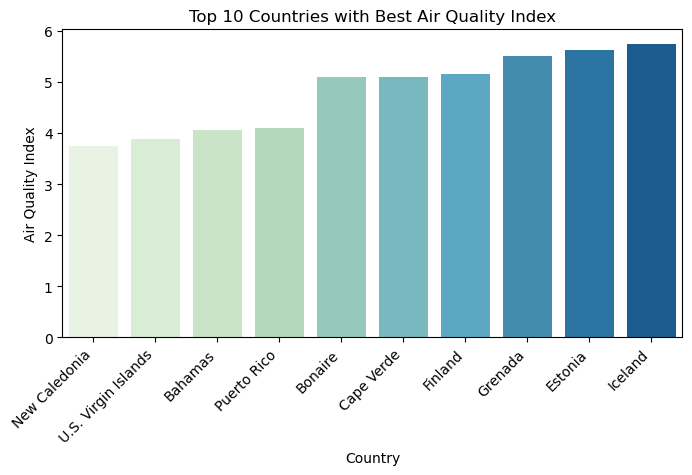

In [62]:
#Create the bar chart for top 10 countries with the best air quality index
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(data=top_10_best_air_quality, x='country', y='air_quality_index',palette="GnBu", hue='country')
ax.tick_params(axis='x', rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')

plt.title('Top 10 Countries with Best Air Quality Index')
plt.xlabel('Country')
plt.ylabel('Air Quality Index')

plt.show()

*Answer to research question:*  
The country with best quality index is New Caledonia.  
The first five countries are islands.  
All of the top 10 are located in the Northern Hemisphere. This could be a bias in the data, as there could be more samples in the northern hemisphere.

*Research question:* Is there any relationship between population and air quality index?

In [63]:
# summarize by year
summary_by_year = countries_df.groupby(['year']).agg({'population': 'sum', 'air_quality_index': 'median'})

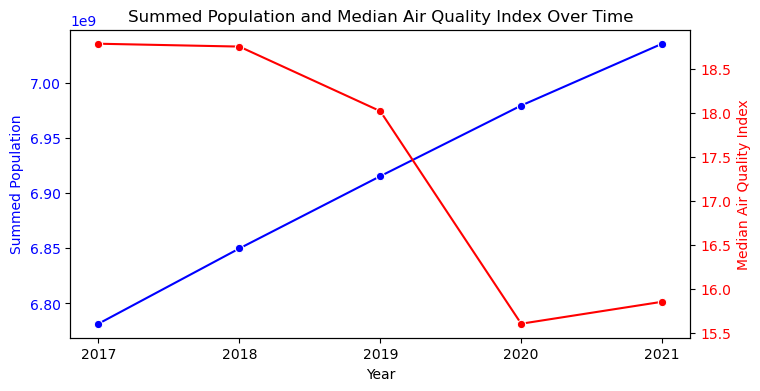

In [64]:
# Create the dual-axis line chart
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the summed population on the primary y-axis
sns.lineplot(data=summary_by_year, x='year', y='population', ax=ax1, marker='o', color='b')
ax1.set_ylabel('Summed Population', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis to plot the averaged air quality index
ax2 = ax1.twinx()
sns.lineplot(data=summary_by_year, x='year', y='air_quality_index', ax=ax2, marker='o', color='r')
ax2.set_ylabel('Median Air Quality Index', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set plot title and x-axis label
plt.title('Summed Population and Median Air Quality Index Over Time')
ax1.set_xlabel('Year')

ax1.xaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.show()


*Answer to research question:* As population has steadly been growing, the air quality does not show the same pattern.  
In 2020, the air quality has improved -likely due to the covid19 pandemic- and in 2021 has increase its value (decrease the quality).  
Even after 2020, an improvement on the air quality could be seen.


### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time, I would include more years in the analysis. There was data for population, but not for air quality data.  
I would look for the population data by city instead of country. Additionally, some terrain data to understand how it impacts popultation grow and air quality.
On the analysis side, the countries could be analyzed by continents.